# Missing value #1 (Fill some data)

## 1. Detect the missing value

In [1]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='missing')

In [2]:
df.head()

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0


In [3]:
df

,Sex,Height
0,F,162.0
1,M,162.0
2,F,163.0
3,M,165.0
4,M,167.0
5,M,165.0
6,M,169.0
7,F,155.0
8,M,163.0
9,M,166.0


In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df[df.isna().any(axis=1)]

<AxesSubplot: >

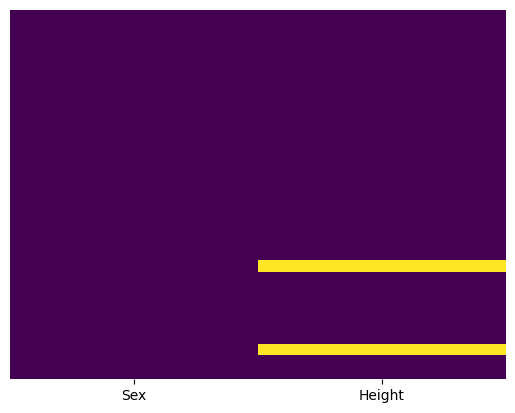

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 2. Fill the N/A value with mean

In [ ]:
df_fill_with_mean = df.copy()

In [ ]:
df_fill_with_mean[df_fill_with_mean.isna().any(axis=1)]

In [ ]:
avg_height = df_fill_with_mean['Height'].mean()

In [ ]:
avg_height

In [ ]:
df_fill_with_mean['Height'] = df_fill_with_mean['Height'].fillna(avg_height)

In [ ]:
df_fill_with_mean.isna().sum()

In [ ]:
df_fill_with_mean.iloc[[21,28]]

In [ ]:
df_fill_with_mean[df.isna().any(axis=1)]

##  3. Filling the N/A value with mean of each group

In [ ]:
df_fill_with_mean_of_group = df.copy()

In [ ]:
sns.boxplot(x='Sex',y='Height',data=df_fill_with_mean_of_group)

In [ ]:
M = df_fill_with_mean_of_group.loc[df_fill_with_mean_of_group['Sex']=='M']
F = df_fill_with_mean_of_group.loc[df_fill_with_mean_of_group['Sex']=='F']

In [ ]:
M.mean()

In [ ]:
F.mean()

In [ ]:
import numpy as np
avg_M = np.average(M['Height'].dropna())
avg_F = np.average(F['Height'].dropna())

In [ ]:
avg_F

In [ ]:
def replace_height(x):
    sex = x[0]
    h = x[1]
    if pd.isnull(h):
        if sex == 'M':
            return avg_M
        elif sex == 'F':
            return avg_F
    else:
        return h

In [ ]:
df_fill_with_mean_of_group['Height'] = df_fill_with_mean_of_group[['Sex','Height']].apply(replace_height,axis=1)

In [ ]:
df_fill_with_mean_of_group.isna().sum()

In [ ]:
df_fill_with_mean_of_group[df.isna().any(axis=1)]

## 4. Filling the N/A value with scikid learn

In [ ]:
df_sklearn = df.copy()

In [ ]:
from sklearn.impute import SimpleImputer
my_fill_tech = SimpleImputer(strategy = 'median')
fill_data = my_fill_tech.fit_transform(df_sklearn.drop('Sex',axis=1))

In [ ]:
df_sklearn['Height']=pd.DataFrame(fill_data)

In [ ]:
df_sklearn.isna().sum()

In [ ]:
df_sklearn[df.isna().any(axis=1)]

## 5. Filling the N/A value for caterical data

In [ ]:
df = pd.read_excel('dataset.xlsx', sheet_name='missing2')

In [ ]:
df_category = df.copy()

In [ ]:
df_category.info()

In [ ]:
df_category.isna().sum()

In [ ]:
df_category[df_category.isna().any(axis=1)]

In [ ]:
sns.heatmap(df_category.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
len(df[df['Sex']=='F'])

In [ ]:
len(df[df['Sex']=='M'])

In [ ]:
from sklearn.impute import SimpleImputer
my_fill_tech = SimpleImputer(strategy = 'most_frequent')
fill_data = my_fill_tech.fit_transform(df_category.drop('Height',axis=1))

In [ ]:
df_category['Sex']=pd.DataFrame(fill_data)

In [ ]:
df_category.info()

In [ ]:
df_category[df.isna().any(axis=1)]

# Missing value #2 (Fill nothing)

## 1. Mark N/A value with additional column

In [ ]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='missing')

In [ ]:
df.info()

In [ ]:
df_add_col = df.copy()
df_add_col['mark'] = df_add_col['Height'].isnull()

In [ ]:
df_add_col

In [ ]:
df

## 2. Delete the row with N/A value

In [ ]:
df_del = df.copy()

In [ ]:
df_del = df_del.dropna(axis=0)

In [ ]:
df_del.info()

In [ ]:
df_del